In [247]:
import re
import nltk ,requests
from bs4 import BeautifulSoup
from collections import Counter
from docx import Document
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [248]:
url = 'http://quotes.toscrape.com'
page = requests.get(url)

In [249]:
 soup = BeautifulSoup(page.content, 'html.parser')

In [250]:
 quote = soup.find_all('span', attrs={'class':'text'})

In [251]:
 quotes = [q.text.replace('“', '').replace('”', '') for q in quote]

In [252]:
s = ' '
s = s.join(quotes)

In [253]:
wList = word_tokenize(s)
print(wList)

['The', 'world', 'as', 'we', 'have', 'created', 'it', 'is', 'a', 'process', 'of', 'our', 'thinking', '.', 'It', 'can', 'not', 'be', 'changed', 'without', 'changing', 'our', 'thinking', '.', 'It', 'is', 'our', 'choices', ',', 'Harry', ',', 'that', 'show', 'what', 'we', 'truly', 'are', ',', 'far', 'more', 'than', 'our', 'abilities', '.', 'There', 'are', 'only', 'two', 'ways', 'to', 'live', 'your', 'life', '.', 'One', 'is', 'as', 'though', 'nothing', 'is', 'a', 'miracle', '.', 'The', 'other', 'is', 'as', 'though', 'everything', 'is', 'a', 'miracle', '.', 'The', 'person', ',', 'be', 'it', 'gentleman', 'or', 'lady', ',', 'who', 'has', 'not', 'pleasure', 'in', 'a', 'good', 'novel', ',', 'must', 'be', 'intolerably', 'stupid', '.', 'Imperfection', 'is', 'beauty', ',', 'madness', 'is', 'genius', 'and', 'it', "'s", 'better', 'to', 'be', 'absolutely', 'ridiculous', 'than', 'absolutely', 'boring', '.', 'Try', 'not', 'to', 'become', 'a', 'man', 'of', 'success', '.', 'Rather', 'become', 'a', 'man', 

In [254]:
stop_words = set(stopwords.words('english'))

In [255]:
wordList = [word for word in wList if not word in stop_words]
print(wordList)

['The', 'world', 'created', 'process', 'thinking', '.', 'It', 'changed', 'without', 'changing', 'thinking', '.', 'It', 'choices', ',', 'Harry', ',', 'show', 'truly', ',', 'far', 'abilities', '.', 'There', 'two', 'ways', 'live', 'life', '.', 'One', 'though', 'nothing', 'miracle', '.', 'The', 'though', 'everything', 'miracle', '.', 'The', 'person', ',', 'gentleman', 'lady', ',', 'pleasure', 'good', 'novel', ',', 'must', 'intolerably', 'stupid', '.', 'Imperfection', 'beauty', ',', 'madness', 'genius', "'s", 'better', 'absolutely', 'ridiculous', 'absolutely', 'boring', '.', 'Try', 'become', 'man', 'success', '.', 'Rather', 'become', 'man', 'value', '.', 'It', 'better', 'hated', 'loved', '.', 'I', 'failed', '.', 'I', "'ve", 'found', '10,000', 'ways', 'wo', "n't", 'work', '.', 'A', 'woman', 'like', 'tea', 'bag', ';', 'never', 'know', 'strong', "'s", 'hot', 'water', '.', 'A', 'day', 'without', 'sunshine', 'like', ',', 'know', ',', 'night', '.']


In [256]:
word_type = nltk.pos_tag(wordsList)
print(len(word_type))

171


In [257]:
counts = Counter( (word,tag) for word, tag in word_type)
print(sum(counts.values()))

171


In [258]:
print(counts)

Counter({('is', 'VBZ'): 12, ('a', 'DT'): 7, ('be', 'VB'): 6, ('to', 'TO'): 5, ('our', 'PRP$'): 4, ('you', 'PRP'): 4, ('The', 'DT'): 3, ('as', 'IN'): 3, ('it', 'PRP'): 3, ('of', 'IN'): 3, ('It', 'PRP'): 3, ('what', 'WP'): 3, ('than', 'IN'): 3, ('are', 'VBP'): 3, ('not', 'RB'): 3, ('we', 'PRP'): 2, ('have', 'VBP'): 2, ('thinking.', 'NN'): 2, ('without', 'IN'): 2, ('that', 'WDT'): 2, ('ways', 'NNS'): 2, ('though', 'IN'): 2, ('miracle.', 'NN'): 2, ('in', 'IN'): 2, ("it's", 'JJ'): 2, ('absolutely', 'RB'): 2, ('man', 'NN'): 2, ('for', 'IN'): 2, ('world', 'NN'): 1, ('created', 'VBN'): 1, ('process', 'NN'): 1, ('cannot', 'VBZ'): 1, ('changed', 'VBN'): 1, ('changing', 'VBG'): 1, ('choices,', 'NN'): 1, ('Harry,', 'NNP'): 1, ('show', 'VBP'): 1, ('truly', 'VBP'): 1, ('are,', 'JJ'): 1, ('far', 'RB'): 1, ('more', 'JJR'): 1, ('abilities.', 'NN'): 1, ('There', 'EX'): 1, ('only', 'RB'): 1, ('two', 'CD'): 1, ('live', 'VB'): 1, ('your', 'PRP$'): 1, ('life.', 'JJ'): 1, ('One', 'CD'): 1, ('nothing', 'NN'):

In [259]:
Word_And_Type= []
Count = []
Word = []
Type = []

In [260]:
 for w, c in counts.most_common(100): 
    Word_And_Type.append(w)
    Count.append(c)

In [261]:
print(Word_And_Type)

[('is', 'VBZ'), ('a', 'DT'), ('be', 'VB'), ('to', 'TO'), ('our', 'PRP$'), ('you', 'PRP'), ('The', 'DT'), ('as', 'IN'), ('it', 'PRP'), ('of', 'IN'), ('It', 'PRP'), ('what', 'WP'), ('than', 'IN'), ('are', 'VBP'), ('not', 'RB'), ('we', 'PRP'), ('have', 'VBP'), ('thinking.', 'NN'), ('without', 'IN'), ('that', 'WDT'), ('ways', 'NNS'), ('though', 'IN'), ('miracle.', 'NN'), ('in', 'IN'), ("it's", 'JJ'), ('absolutely', 'RB'), ('man', 'NN'), ('for', 'IN'), ('world', 'NN'), ('created', 'VBN'), ('process', 'NN'), ('cannot', 'VBZ'), ('changed', 'VBN'), ('changing', 'VBG'), ('choices,', 'NN'), ('Harry,', 'NNP'), ('show', 'VBP'), ('truly', 'VBP'), ('are,', 'JJ'), ('far', 'RB'), ('more', 'JJR'), ('abilities.', 'NN'), ('There', 'EX'), ('only', 'RB'), ('two', 'CD'), ('live', 'VB'), ('your', 'PRP$'), ('life.', 'JJ'), ('One', 'CD'), ('nothing', 'NN'), ('other', 'JJ'), ('everything', 'NN'), ('person,', 'NN'), ('gentleman', 'JJ'), ('or', 'CC'), ('lady,', 'NN'), ('who', 'WP'), ('has', 'VBZ'), ('pleasure', '

In [262]:
for w, t in Word_And_Type:
    Word.append(w)
    Type.append(t)

In [263]:
 df = pd.DataFrame({"Word":Word,"Type":Type,"Count":Count})

In [264]:
df

,Word,Type,Count
0,is,VBZ,12
1,a,DT,7
2,be,VB,6
3,to,TO,5
4,our,PRP$,4
...,...,...,...
95,never,RB,1
96,know,VBP,1
97,how,WRB,1
98,strong,JJ,1


Text(0, 0.5, 'Count')

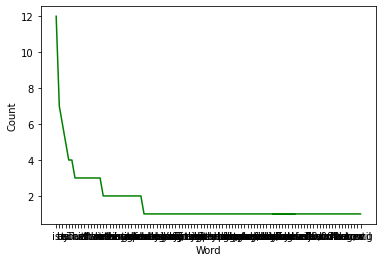

In [265]:
plt.plot(df.Word, df.Count,color='green')
plt.xlabel('Word')
plt.ylabel('Count')

In [266]:
allData = zip(Word, Type, Count)

In [267]:
document = Document()
print(document)

In [268]:
 document.add_heading('Word Scraper Counter', level=1)

In [269]:
 table = document.add_table(rows=1, cols=3)

In [270]:
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Word'
hdr_cells[1].text = 'Type'
hdr_cells[2].text = 'Count'

In [271]:
for word, typ, count in allData:
    row_cells = table.add_row().cells
    row_cells[0].text = word
    row_cells[1].text = typ
    row_cells[2].text = str(count)

In [272]:
document.add_page_break()

In [275]:
 document.save('File.docx')

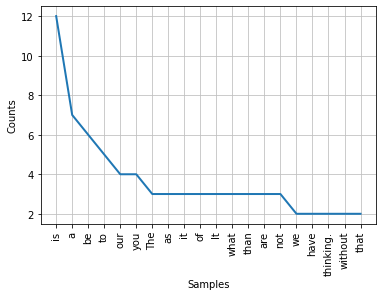

In [274]:
fd = nltk.FreqDist(wordsList)
fd.plot(20)